In [4]:
import numpy as np
import arviz as az
from branching_sus.implementation import ConvexGraphBranching, SubsetSimulation
from branching_sus.performance_function import breitung, himmel
import branching_sus.plot as bplt
import branching_sus.estimate as est
import matplotlib.pyplot as plt
import json
import itertools
import pandas as pd
from scipy.spatial.distance import euclidean
import os
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
from numpy.random import default_rng
from scipy.stats import multivariate_normal, norm
from sklearn.neighbors import KNeighborsTransformer
import numpy as np
import arviz as az
from sklearn.neighbors import KNeighborsTransformer
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
from sklearn.cross_decomposition import PLSCanonical
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import pairwise_distances
from scipy.spatial import Voronoi,voronoi_plot_2d
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import networkx as nx
%matplotlib inline

In [5]:
os.chdir('../numerical_examples')

# Piecewise Linear Function

In [17]:
ref = 3.2e-5

## KDE

In [17]:
with open("bre_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_sus_dim_2 = pd.DataFrame(loaded_results)

with open("bre_bss_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_2 = pd.DataFrame(loaded_results)


In [21]:
bre_sus_dim_2['estimate'].to_list()

[1.2806640000000008e-08,
 1.0686720000000003e-06,
 6.899904000000001e-08,
 1.4229600000000005e-07,
 7.865000000000005e-08,
 1.1244288000000001e-07,
 1.3270400000000002e-06,
 3.009600000000001e-10,
 6.940080000000003e-08,
 1.2122880000000002e-07,
 6.171580800000001e-08,
 4.180000000000001e-08,
 6.897000000000001e-07,
 8.108185800000001e-08,
 3.771424799999999e-09,
 1.3968240000000005e-08,
 4.6563660000000025e-07,
 1.5629328e-07,
 2.0966400000000006e-06,
 8.372000000000001e-08,
 5.889312000000001e-09,
 1.2000000000000004e-07,
 6.732000000000001e-08,
 2.3400000000000005e-06,
 2.475000000000001e-08,
 1.16424e-06,
 2.202200000000001e-07,
 4.1126400000000015e-07,
 5.183640000000002e-06,
 1.4520000000000003e-07,
 5.59728e-08,
 6.81408e-08,
 1.3939200000000002e-05,
 1.1099088e-08,
 2.9272319999999995e-07,
 1.7424e-06,
 3.4560000000000006e-08,
 1.7292352000000003e-08,
 3.171168000000001e-08,
 1.0281960000000003e-06,
 3.726328320000001e-08,
 6.715500000000003e-07,
 2.1249536000000013e-09,
 2.496

C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

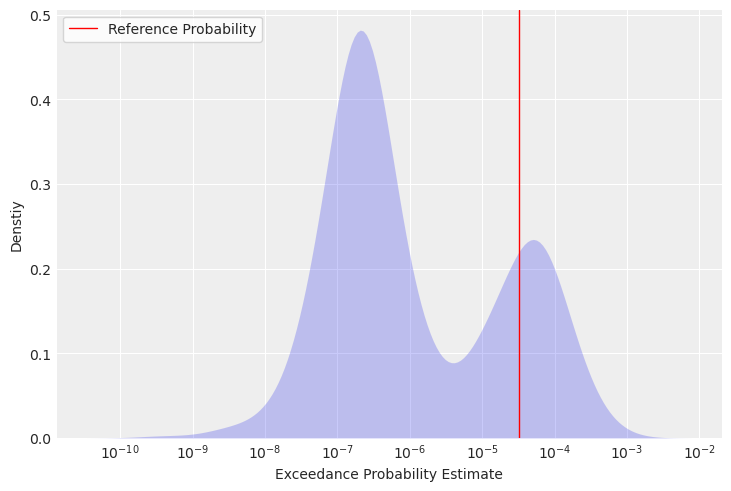

In [80]:
az.style.use('arviz-darkgrid')
label_font_size = 10
tick_size = 10


sns.kdeplot(data=np.array(bre_sus_dim_2['estimate']),
            log_scale=True,
            fill=True,
            linewidth=0,
            )


plt.axvline(ref, color='red', linewidth=1, label='Reference Probability')
plt.legend(loc=2, fontsize=label_font_size,frameon=True,facecolor='white')
plt.xlabel('Exceedance Probability Estimate',fontsize=label_font_size)
plt.ylabel('Denstiy',fontsize=label_font_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

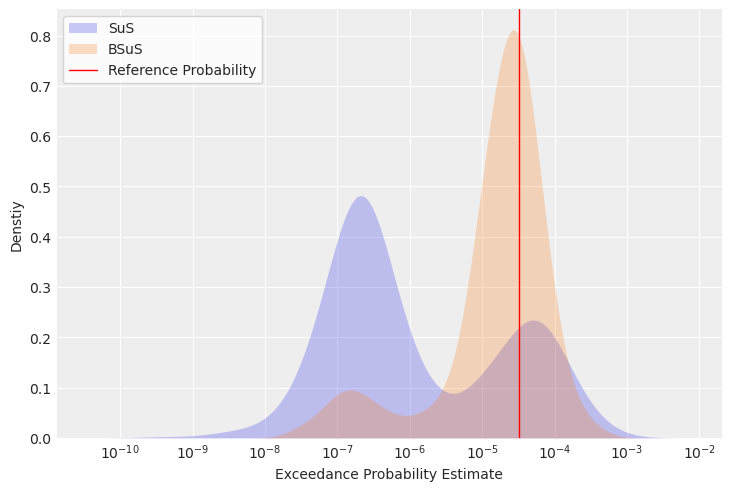

In [22]:

az.style.use('arviz-darkgrid')
label_font_size = 10
tick_size = 10


sns.kdeplot(data=np.array(bre_sus_dim_2['estimate']),
            log_scale=True,
            fill=True,
            linewidth=0,
            label='SuS')

sns.kdeplot(data=np.array(bre_bss_dim_2['estimate']),
            log_scale=True,
            fill=True,
            linewidth=0,
            label='BSuS')
plt.axvline(ref, color='red', linewidth=1, label='Reference Probability')
plt.legend(loc=2, fontsize=label_font_size,frameon=True,facecolor='white')
plt.xlabel('Exceedance Probability Estimate',fontsize=label_font_size)
plt.ylabel('Denstiy',fontsize=label_font_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

## Partition Visualisation

In [35]:
bss = ConvexGraphBranching(performance_function=breitung,
                           dimension=2,
                           level_size=500,
                           threshold=0,
                           level_probability=0.1,
                           seed=3,
                           params=None,
                           convex_budget=100,
                           verbose=False)

bss.run()

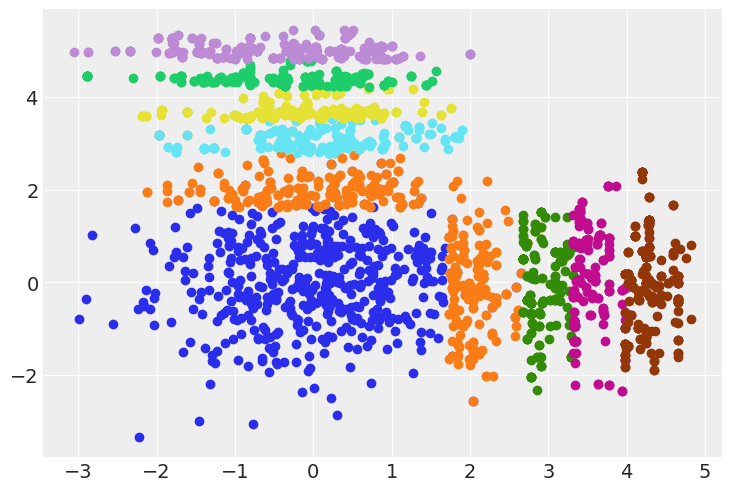

In [39]:
bplt.all_levels(bss)

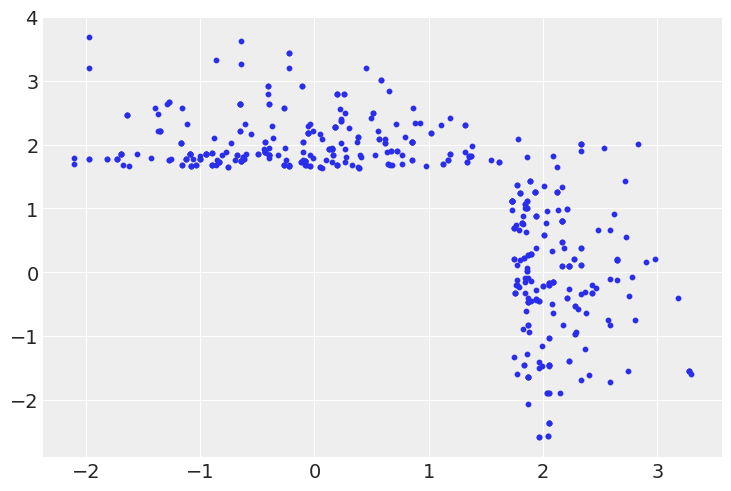

In [24]:
level = bss.find('2')
level_array = np.array([samp.array for samp in level.sample_list])
plotter = level_array.T
plt.scatter(plotter[0],plotter[1],
            s=10)

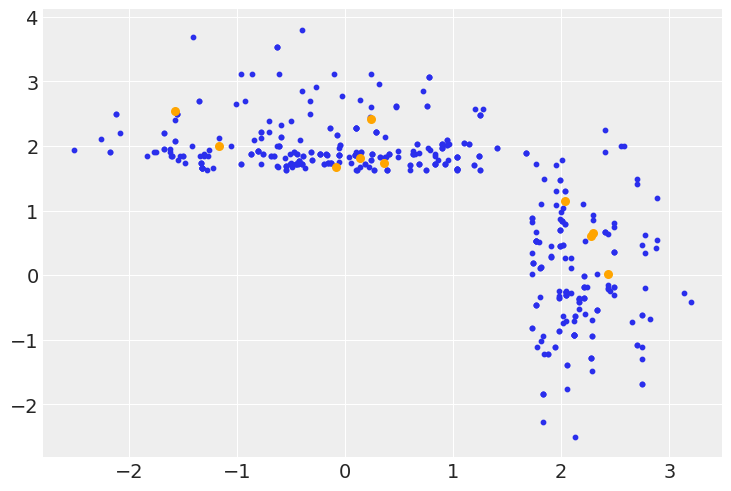

In [33]:
level = bss.find('2')
level_array = np.array([samp.array for samp in level.sample_list])
plotter = level_array.T
plt.scatter(plotter[0],plotter[1],
            s=10)

info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
plt.scatter(plotter[0],plotter[1],s=30, color='orange')


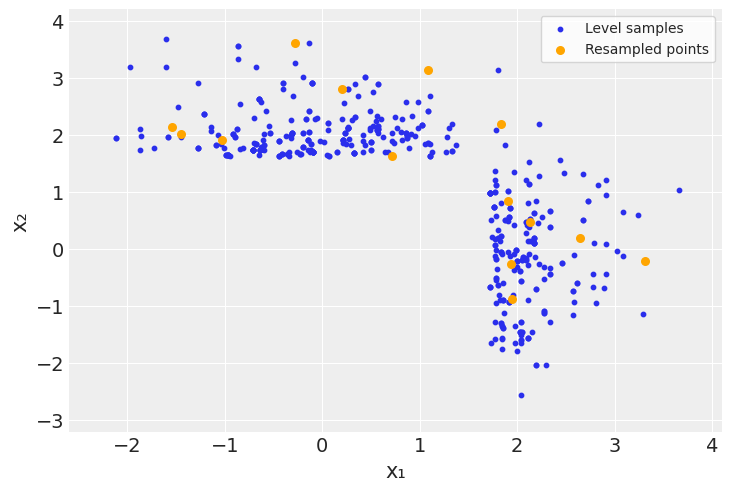

In [40]:
az.style.use('arviz-darkgrid')
level = bss.find('2')
level_array = np.array([samp.array for samp in level.sample_list])
plotter = level_array.T
plt.scatter(plotter[0],plotter[1],
            s=10,label = 'Level samples')

info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
plt.scatter(plotter[0],plotter[1],s=30, color='orange', label = 'Resampled points')

plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

plt.legend(fontsize=10,frameon=True,facecolor='white')

Text(0, 0.5, 'x₂')

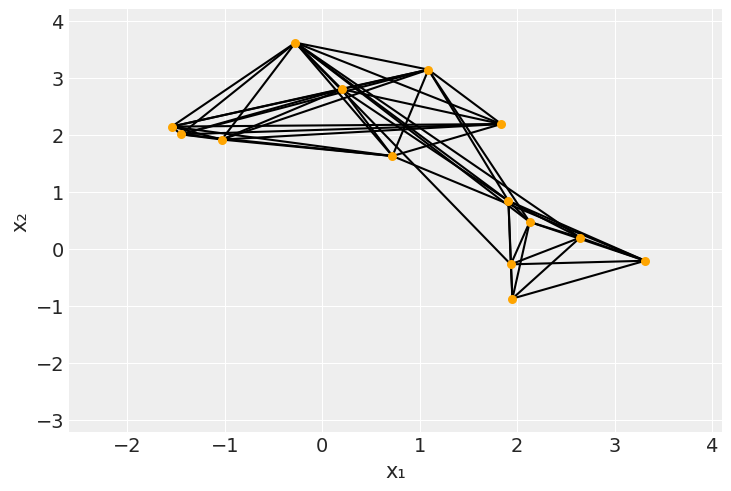

In [41]:
az.style.use('arviz-darkgrid')
info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
graph = info.graph
adj = nx.adjacency_matrix(graph)


for i in range(len(plotter.T)):
    for j in range(i + 1, len(plotter.T)):
        if adj[i, j] == 1:
            plt.plot([plotter.T[i, 0],plotter.T[j, 0]], [plotter.T[i, 1], plotter.T[j, 1]], color='black',zorder=1)
            
plt.scatter(plotter[0],plotter[1],s=30,zorder=2,color='orange')


plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

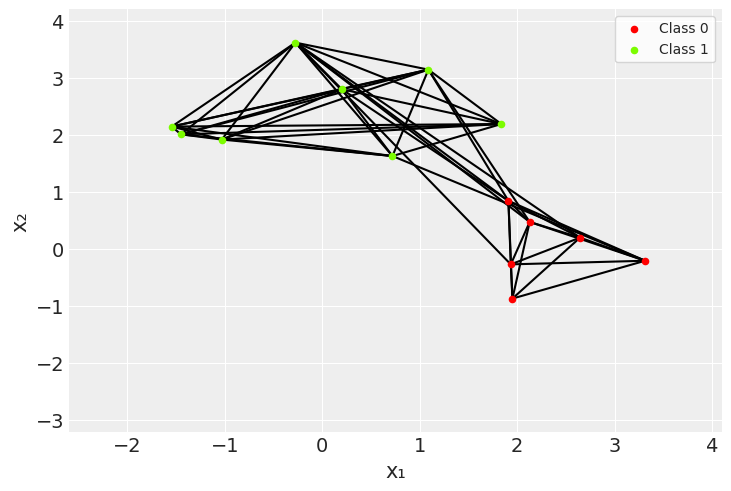

In [42]:
sample_partition = info.sample_partition

info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
graph = info.graph
adj = nx.adjacency_matrix(graph)


for i in range(len(plotter.T)):
    for j in range(i + 1, len(plotter.T)):
        if adj[i, j] == 1:
            plt.plot([plotter.T[i, 0],plotter.T[j, 0]], [plotter.T[i, 1], plotter.T[j, 1]], color='black',zorder=1)
            
            
for part_set,c,label in zip(sample_partition,['red','lawngreen'],['Class 0','Class 1']):
    plotter = np.array([samp.array for samp in part_set]).T
    plt.scatter(plotter[0],plotter[1],s=20,zorder=2,color=c,label=label)
    

    
plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)


plt.legend(fontsize=10,frameon=True,facecolor='white')

In [43]:
def contour_plot(x_range, y_range, step, function, levels=None):
    x = np.arange(x_range[0], x_range[1], step)
    y = np.arange(y_range[0], y_range[1], step)
    xx, yy = np.meshgrid(x, y)
    flat = np.vstack([xx.ravel(), yy.ravel()])
    z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
    plt.contour(xx, yy, z, levels=levels,colors='black')

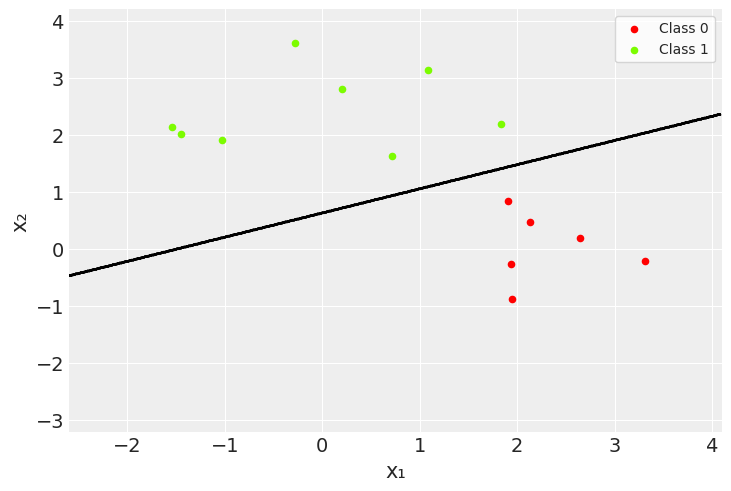

In [44]:
classifier = info.classifier
for part_set,c,label in zip(sample_partition,['red','lawngreen'],['Class 0','Class 1']):
    plotter = np.array([samp.array for samp in part_set]).T
    plt.scatter(plotter[0],plotter[1],s=20,zorder=2,color=c,label=label)
    
    
contour_plot((-2.6,4.1), (-3.2,4.2), 0.01, classifier, levels=None)

plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

plt.legend(fontsize=10,frameon=True,facecolor='white')

Text(0, 0.5, 'x₂')

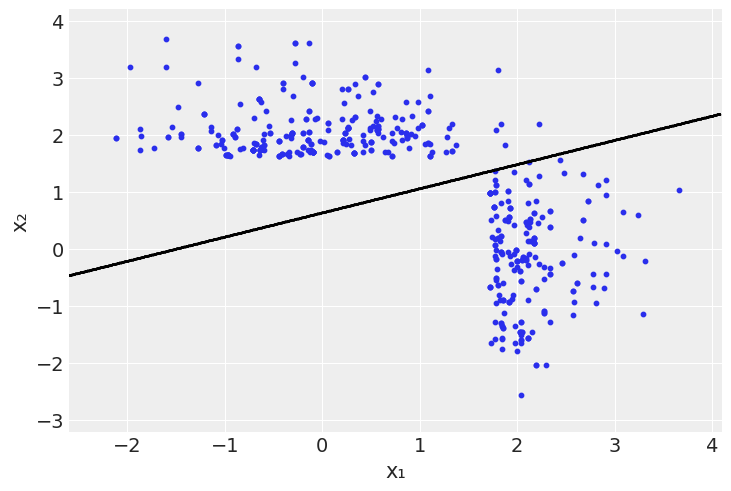

In [46]:
level = bss.find('2')
level_array = np.array([samp.array for samp in level.sample_list])
plotter = level_array.T
plt.scatter(plotter[0],plotter[1],
            s=10)


contour_plot((-2.6,4.1), (-3.2,4.2), 0.01, classifier, levels=None)

plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

## Example Visualisation

### Subset Simulation

In [170]:
sus = SubsetSimulation(performance_function=breitung,
                       dimension=2,
                       level_size=500,
                       threshold=0,
                       level_probability=0.1,
                       seed=0,
                       verbose=False)

sus.run()

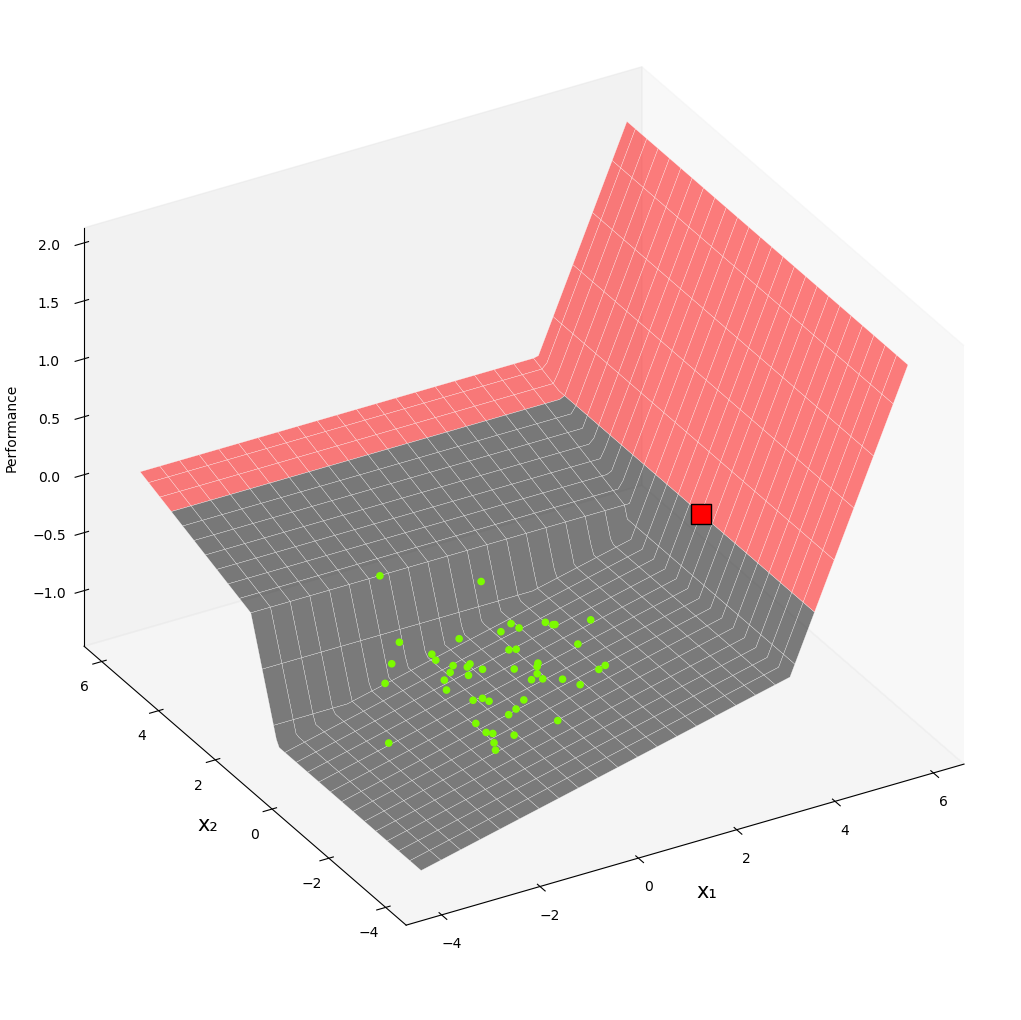

In [171]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)



cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)


    

re_level = sus.all_levels[0].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')

    

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )


plt.show()

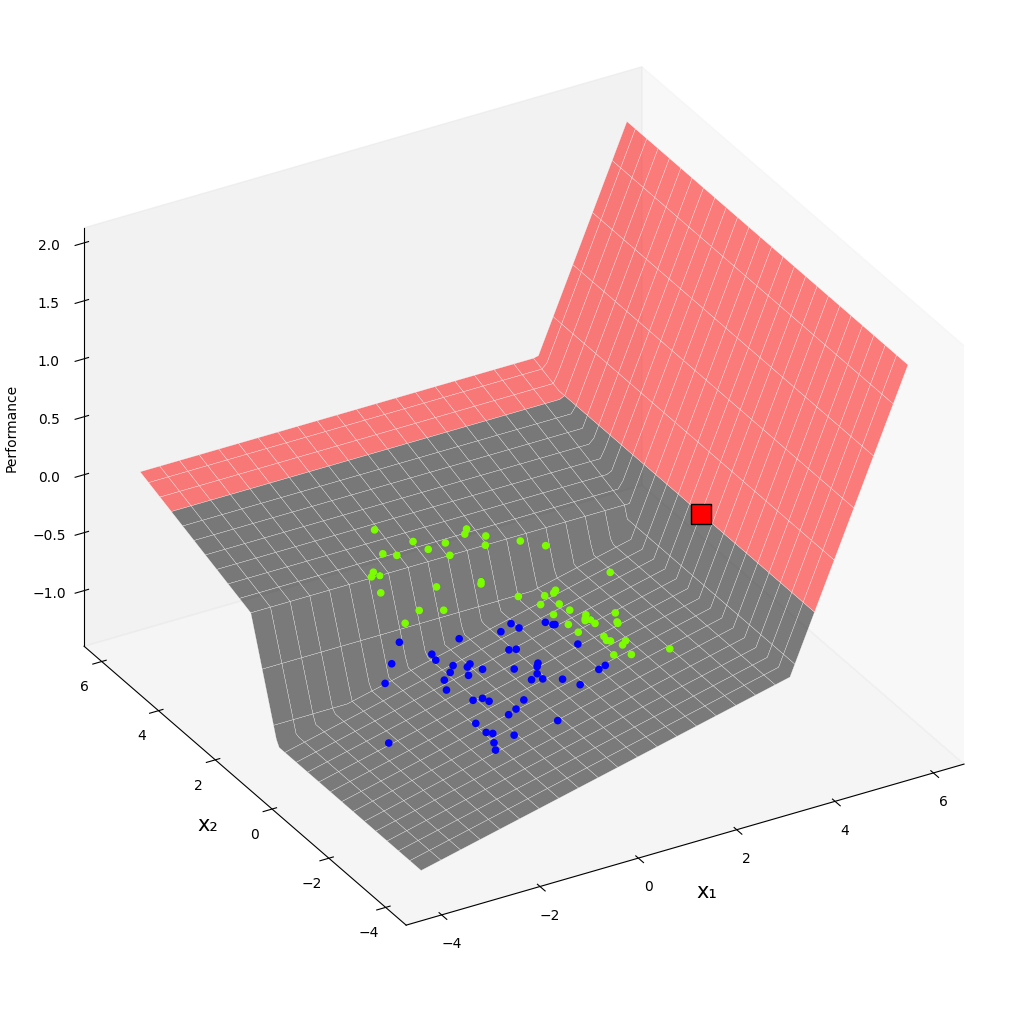

In [48]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)



    
for level in sus.all_levels[:1]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')
    

re_level = sus.all_levels[1].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )


plt.show()

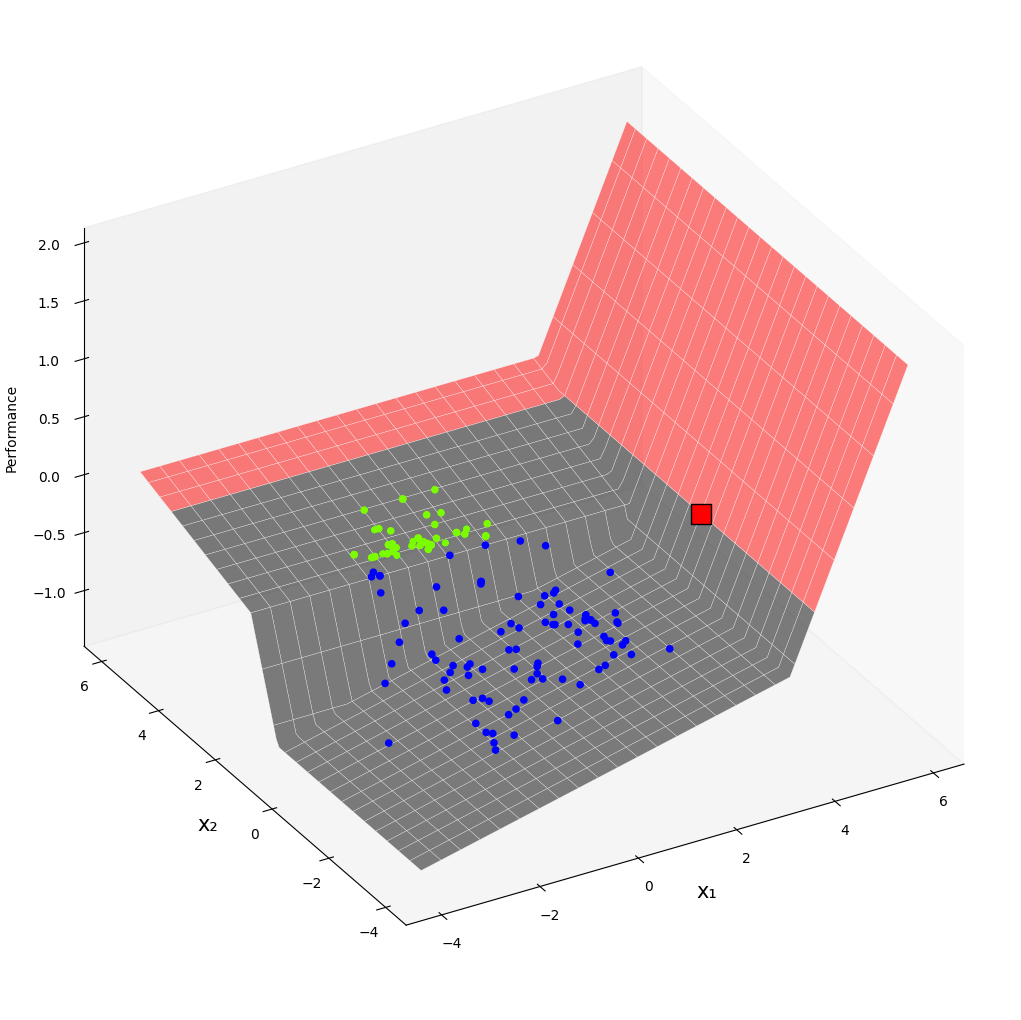

In [42]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)


    
for level in sus.all_levels[:2]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')
    

re_level = sus.all_levels[2].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )


plt.show()

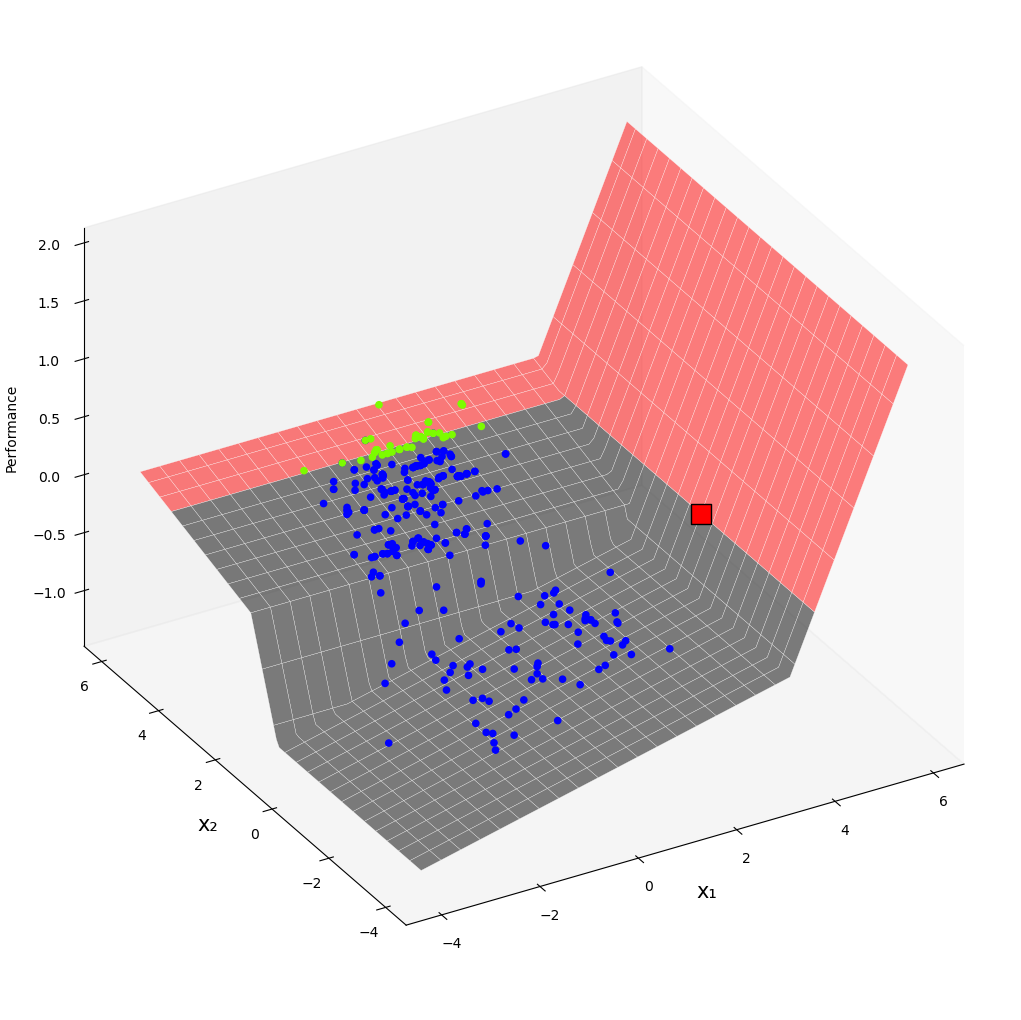

In [172]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)


    
for level in sus.all_levels[:6]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')
    

re_level = sus.all_levels[6].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )




plt.show()

### Branching Subset Simulation

In [81]:
bss = ConvexGraphBranching(performance_function=breitung,
                           dimension=2,
                           level_size=500,
                           threshold=0,
                           level_probability=0.1,
                           seed=3,
                           params=None,
                           convex_budget=50,
                           verbose=False)

bss.run()

C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [82]:
partition_info = bss.partitioner.get_partition_information_for_level(bss.find('2'))
classifier = partition_info.classifier
performance_function = breitung

x_range = (-4,5.9)
y_range = (-4,6)
step =  0.01
function = classifier
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()

contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]

partition_x = contour_points[0].T[0]
partition_y = contour_points[0].T[1]
partition_z = np.array([performance_function(pt) for pt in contour_points[0]])

C:\Users\hkinn\AppData\Local\Temp\ipykernel_1148\2408326842.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


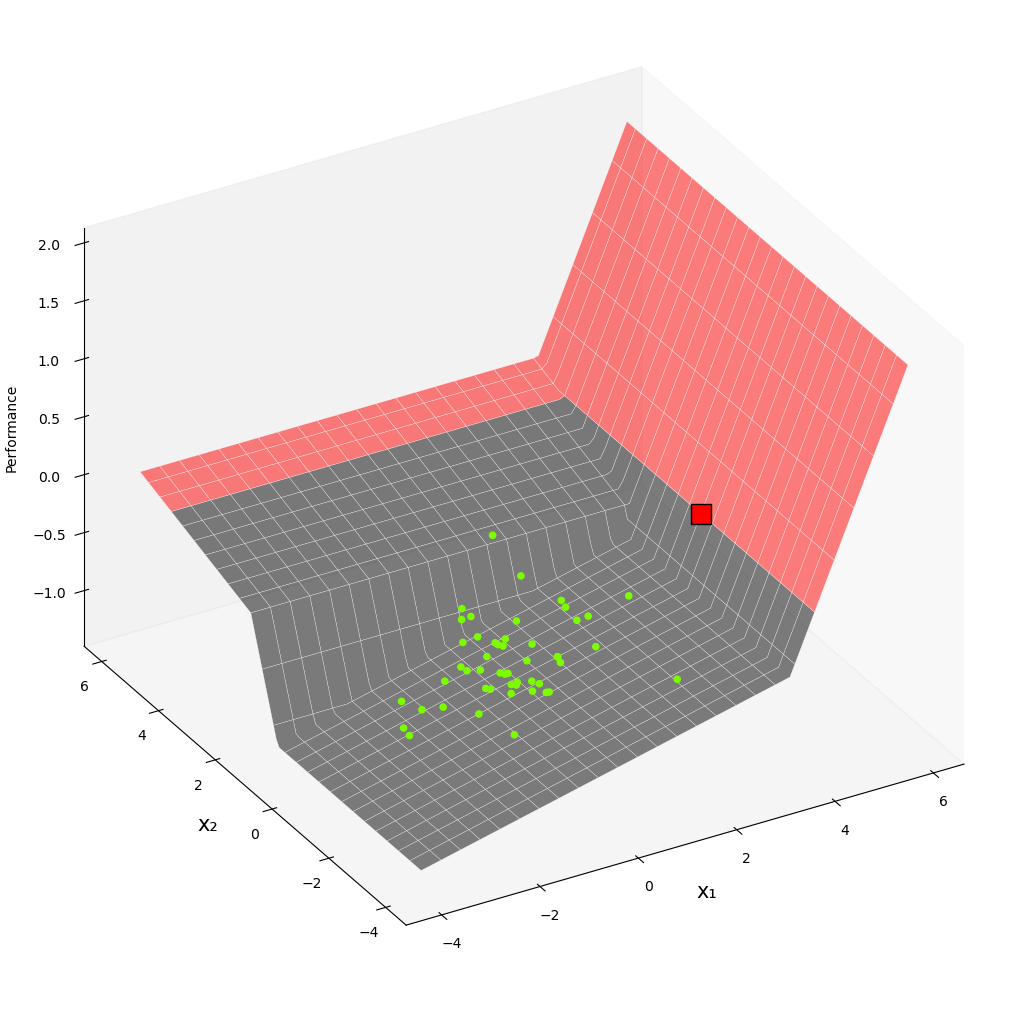

In [85]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)



    

re_level = bss.all_levels[0].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )


plt.show()

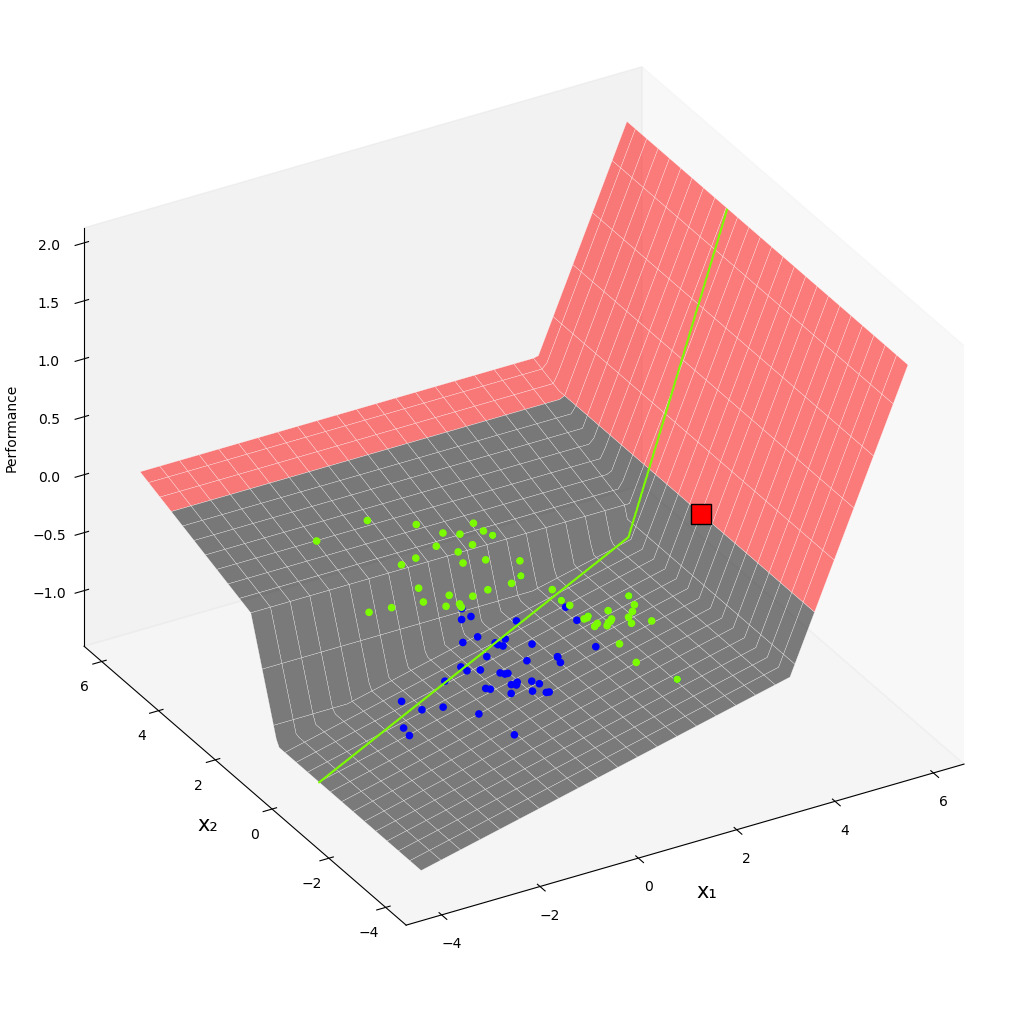

In [86]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)


    
for level in bss.all_levels[:1]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')
    

re_level = bss.all_levels[1].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )

ax.plot3D(partition_x,
          partition_y,
          partition_z,
          alpha=1,
          color='lawngreen')

plt.show()

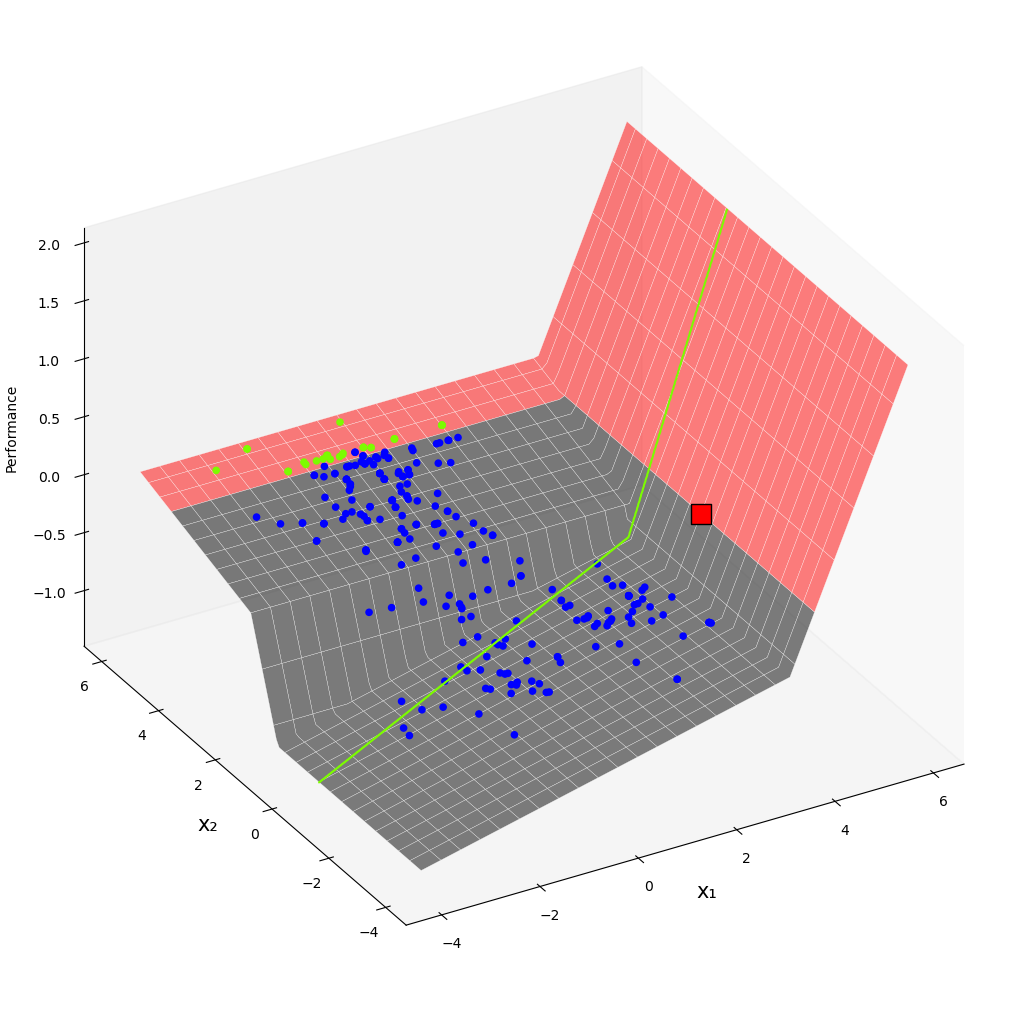

In [92]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)


    
for level in bss.all_levels[:7]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')
    

re_level = bss.all_levels[7].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )

ax.plot3D(partition_x,
          partition_y,
          partition_z,
          alpha=1,
          color='lawngreen')

plt.show()

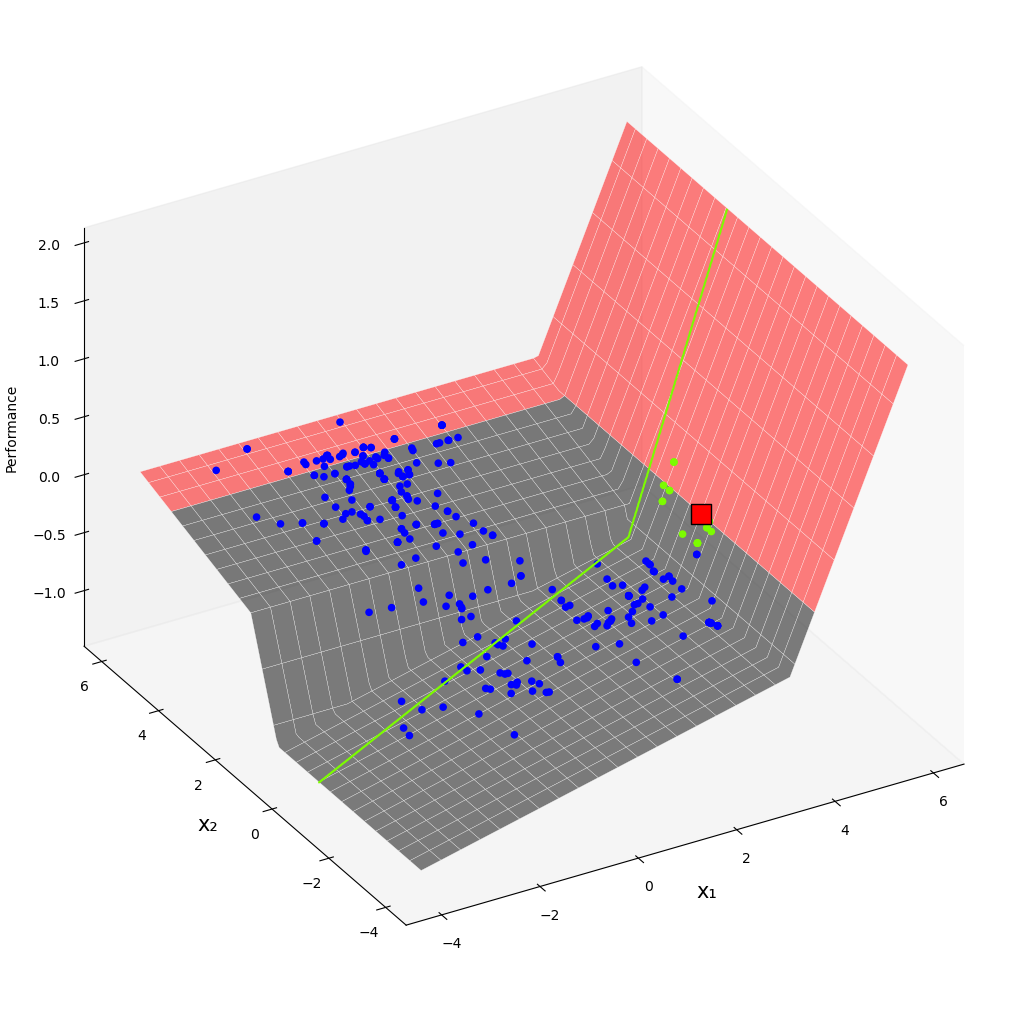

In [94]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = breitung
az.style.use('default')

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)

cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)
plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.set_zlabel('Performance',fontsize=10,rotation=90,labelpad=10)
ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')
ax.grid(False)


    
for level in bss.all_levels[:9]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')
    

re_level = bss.all_levels[9].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')



ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           marker = 's',
           s=200, color='r',
           edgecolor='black',
           )

ax.plot3D(partition_x,
          partition_y,
          partition_z,
          alpha=1,
          color='lawngreen')

plt.show()

## Numerical Example

In [95]:
def evals_error(data):
    estimates = np.array(data['estimate'])
    error = mean_squared_error(np.log(ref) * np.ones(len(estimates)), np.log(estimates))
    evals = np.array(data['evals']).mean()
    return evals, error


In [96]:
with open("bre_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_sus_dim_2 = pd.DataFrame(loaded_results)


with open("bre_bss_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_2 = pd.DataFrame(loaded_results)


with open("bre_bss_dim_50.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_50 = pd.DataFrame(loaded_results)


In [97]:
bre_sus_dim_2_points = []
for size in [100,250,500,750,1000,1250,1500,2000,3000]:
    bre_sus_dim_2_points.append(evals_error(bre_sus_dim_2[bre_sus_dim_2['size']==size]))
    
bre_bss_dim_2_budg_100_points = []
bre_bss_dim_2_budg_100 = bre_bss_dim_2[bre_bss_dim_2['budget'] == 100]
for size in [500,1000,1500]:
    bre_bss_dim_2_budg_100_points.append(evals_error(bre_bss_dim_2_budg_100[bre_bss_dim_2_budg_100['size']==size]))
    
bre_bss_dim_2_budg_500_points = []
bre_bss_dim_2_budg_500 = bre_bss_dim_2[bre_bss_dim_2['budget'] == 500]
for size in [500,1000,1500]:
    bre_bss_dim_2_budg_500_points.append(evals_error(bre_bss_dim_2_budg_500[bre_bss_dim_2_budg_500['size']==size]))
    
bre_bss_dim_2_budg_1000_points = []
bre_bss_dim_2_budg_1000 = bre_bss_dim_2[bre_bss_dim_2['budget'] == 1000]
for size in [500,1000,1500]:
    bre_bss_dim_2_budg_1000_points.append(evals_error(bre_bss_dim_2_budg_1000[bre_bss_dim_2_budg_1000['size']==size]))
     
bre_bss_dim_50_budg_100_points = []
bre_bss_dim_50_budg_100 = bre_bss_dim_50[bre_bss_dim_50['budget'] == 100]
for size in [500,1000,1500]:
    bre_bss_dim_50_budg_100_points.append(evals_error(bre_bss_dim_50_budg_100[bre_bss_dim_50_budg_100['size']==size]))
    
bre_bss_dim_50_budg_500_points = []
bre_bss_dim_50_budg_500 = bre_bss_dim_50[bre_bss_dim_50['budget'] == 500]
for size in [500,1000,1500]:
    bre_bss_dim_50_budg_500_points.append(evals_error(bre_bss_dim_50_budg_500[bre_bss_dim_50_budg_500['size']==size]))
    
bre_bss_dim_50_budg_1000_points = []
bre_bss_dim_50_budg_1000 = bre_bss_dim_50[bre_bss_dim_50['budget'] == 1000]
for size in [500,1000,1500]:
    bre_bss_dim_50_budg_1000_points.append(evals_error(bre_bss_dim_50_budg_1000[bre_bss_dim_50_budg_1000['size']==size]))

In [44]:
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_marker("")

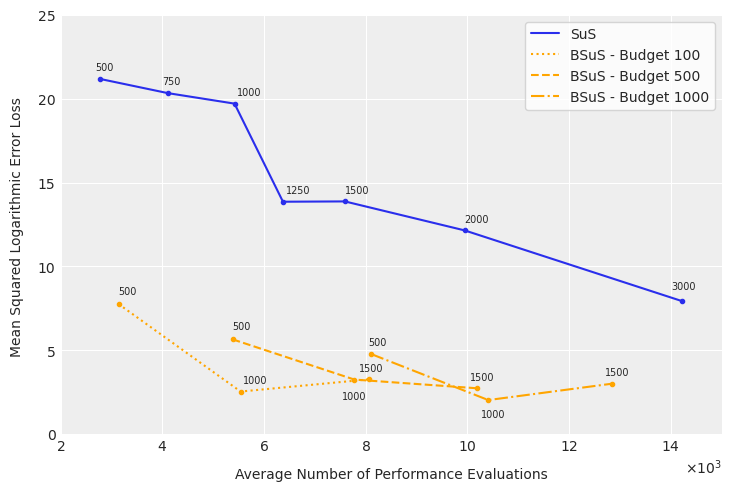

In [101]:
az.style.use('arviz-darkgrid')
markersize = 3
level_text_size = 7
legend_text_size = 10
sci_not_size = 10
axis_label_size = 10
tick_size = 10


plotter = np.array(bre_sus_dim_2_points)[2:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='SuS',
         markersize=markersize)


plt.text(plotter[0][0]-100,plotter[1][0]+0.5,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-100,plotter[1][1]+0.5,'750',  fontsize=level_text_size)
plt.text(plotter[0][2]+50,plotter[1][2]+0.5,'1000',  fontsize=level_text_size)
plt.text(plotter[0][3]+50,plotter[1][3]+0.5,'1250',  fontsize=level_text_size)
plt.text(plotter[0][4],plotter[1][4]+0.5,'1500',  fontsize=level_text_size)
plt.text(plotter[0][5],plotter[1][5]+0.5,'2000',  fontsize=level_text_size)
plt.text(plotter[0][6]-210,plotter[1][6]+0.7,'3000',  fontsize=level_text_size)

plotter = np.array(bre_bss_dim_2_budg_100_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         markersize=markersize,
         color='orange',
         linestyle='dotted',
         label='BSuS - Budget 100')

plt.text(plotter[0][0],plotter[1][0]+0.6,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]+50,plotter[1][1]+0.5,'1000',  fontsize=level_text_size)
plt.text(plotter[0][2]-200,plotter[1][2]+0.5,'1500',  fontsize=level_text_size)


plotter = np.array(bre_bss_dim_2_budg_500_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         markersize=markersize,
         color='orange',
         linestyle='dashed',
         label='BSuS - Budget 500') 

plt.text(plotter[0][0],plotter[1][0]+0.6,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-250,plotter[1][1]-1.2,'1000',  fontsize=level_text_size)
plt.text(plotter[0][2]-150,plotter[1][2]+0.5,'1500',  fontsize=level_text_size)

plotter = np.array(bre_bss_dim_2_budg_1000_points)[:].T
plt.plot(plotter[0],
         plotter[1], 
         marker='o',
         markersize=markersize,
         color='orange',
         linestyle='dashdot',
         label='BSuS - Budget 1000')

plt.text(plotter[0][0]-50,plotter[1][0]+0.5,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-150,plotter[1][1]-1,'1000',  fontsize=level_text_size)
plt.text(plotter[0][2]-150,plotter[1][2]+0.5,'1500',  fontsize=level_text_size)


plt.xlabel('Average Number of Performance Evaluations', fontsize=axis_label_size, labelpad=10)
plt.ylabel('Mean Squared Logarithmic Error Loss ', fontsize=axis_label_size, labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.ylim(0,25)
plt.xlim(2000,15000)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)


plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)},
           fontsize=legend_text_size,
           frameon=True,
           facecolor='white')

ax = plt.gca()
ax.xaxis.offsetText.set_fontsize(sci_not_size)

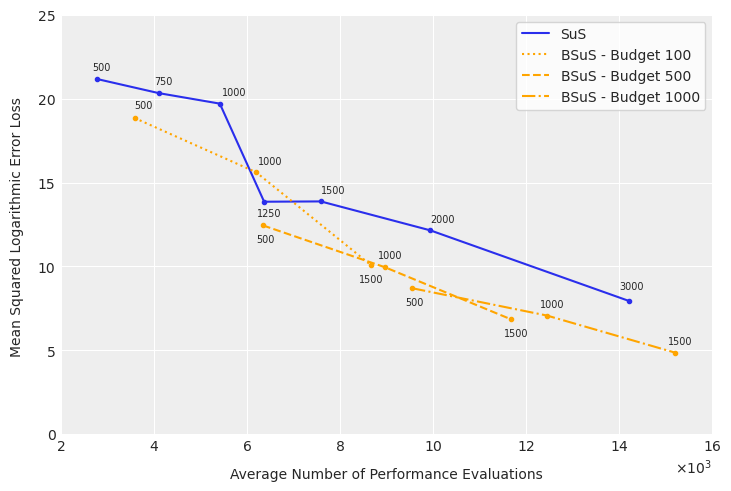

In [102]:
az.style.use('arviz-darkgrid')
markersize = 3
level_text_size = 7
legend_text_size = 10
sci_not_size = 10
axis_label_size = 10
tick_size = 10


plotter = np.array(bre_sus_dim_2_points)[2:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='SuS',
         markersize=markersize)


plt.text(plotter[0][0]-100,plotter[1][0]+0.5,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-100,plotter[1][1]+0.5,'750',  fontsize=level_text_size)
plt.text(plotter[0][2]+50,plotter[1][2]+0.5,'1000',  fontsize=level_text_size)
plt.text(plotter[0][3]-150,plotter[1][3]-0.9,'1250',  fontsize=level_text_size)
plt.text(plotter[0][4],plotter[1][4]+0.5,'1500',  fontsize=level_text_size)
plt.text(plotter[0][5],plotter[1][5]+0.5,'2000',  fontsize=level_text_size)
plt.text(plotter[0][6]-210,plotter[1][6]+0.7,'3000',  fontsize=level_text_size)

plotter = np.array(bre_bss_dim_50_budg_100_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         markersize=markersize,
         color='orange',
         linestyle='dotted',
         label='BSuS - Budget 100')

plt.text(plotter[0][0],plotter[1][0]+0.6,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]+50,plotter[1][1]+0.5,'1000',  fontsize=level_text_size)
plt.text(plotter[0][2]-250,plotter[1][2]-1,'1500',  fontsize=level_text_size)


plotter = np.array(bre_bss_dim_50_budg_500_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         markersize=markersize,
         color='orange',
         linestyle='dashed',
         label='BSuS - Budget 500') 

plt.text(plotter[0][0]-150,plotter[1][0]-1,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-150,plotter[1][1]+0.5,'1000',  fontsize=level_text_size)
plt.text(plotter[0][2]-150,plotter[1][2]-1,'1500',  fontsize=level_text_size)

plotter = np.array(bre_bss_dim_50_budg_1000_points)[:].T
plt.plot(plotter[0],
         plotter[1], 
         marker='o',
         markersize=markersize,
         color='orange',
         linestyle='dashdot',
         label='BSuS - Budget 1000')

plt.text(plotter[0][0]-150,plotter[1][0]-1,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-150,plotter[1][1]+0.5,'1000',  fontsize=level_text_size)
plt.text(plotter[0][2]-150,plotter[1][2]+0.5,'1500',  fontsize=level_text_size)


plt.xlabel('Average Number of Performance Evaluations', fontsize=axis_label_size, labelpad=10)
plt.ylabel('Mean Squared Logarithmic Error Loss ', fontsize=axis_label_size, labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.ylim(0,25)
plt.xlim(2000,16000)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)


plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)},
           fontsize=legend_text_size,
           frameon=True,
           facecolor='white')

ax = plt.gca()
ax.xaxis.offsetText.set_fontsize(sci_not_size)

In [104]:
with open("bre_bss_dim_50_l1.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_50_l1 = pd.DataFrame(loaded_results)

with open("bre_bss_dim_50_l2.json", 'r') as file:
    loaded_results = json.load(file)
bre_bss_dim_50_l2 = pd.DataFrame(loaded_results)

In [105]:
bre_bss_dim_50_l1_points = []
for c in [0.5,2,5,10]:
    bre_bss_dim_50_l1_points.append(evals_error(bre_bss_dim_50_l1[bre_bss_dim_50_l1['C'] == c]))

bre_bss_dim_50_l2_points = []
for c in [0.5,2,5,10]:
    bre_bss_dim_50_l2_points.append(evals_error(bre_bss_dim_50_l2[bre_bss_dim_50_l2['C'] == c]))
    
    
bre_sus_dim_2_points = []
for size in [1500,2000]:
    bre_sus_dim_2_points.append(evals_error(bre_sus_dim_2[bre_sus_dim_2['size']==size]))

(2.0, 16.0)

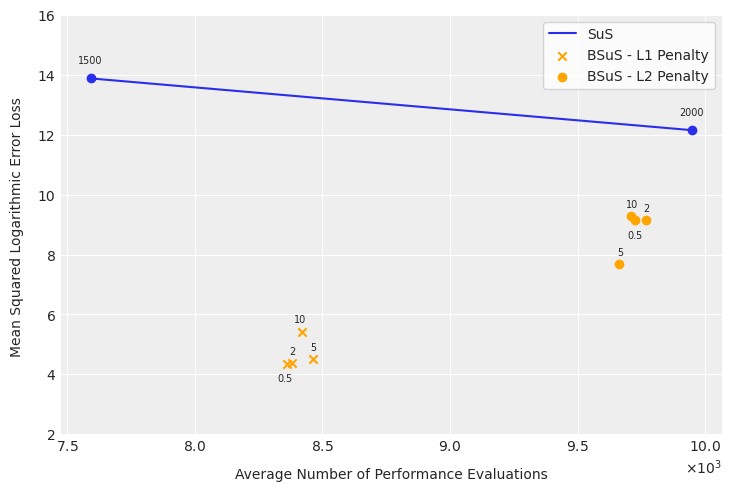

In [106]:
az.style.use('arviz-darkgrid')
tick_size = 10
axis_label_size =10
legend_text_size = 10
sci_not_size = 10
level_text_size = 7

plotter = np.array(bre_sus_dim_2_points)[:].T
plt.plot(plotter[0],plotter[1], marker='o', label = 'SuS')

plt.text(plotter[0][0]-50,plotter[1][0]+0.5,'1500',  fontsize=level_text_size)
plt.text(plotter[0][1]-50,plotter[1][1]+0.5,'2000',  fontsize=level_text_size)


plotter = np.array(bre_bss_dim_50_l1_points)[:].T
plt.scatter(plotter[0],plotter[1],color='orange', marker='x', label='BSuS - L1 Penalty')

plt.text(plotter[0][0]-40,plotter[1][0]-0.6,'0.5',  fontsize=level_text_size)
plt.text(plotter[0][1]-10,plotter[1][1]+0.3,'2',  fontsize=level_text_size)
plt.text(plotter[0][2]-10,plotter[1][2]+0.3,'5',  fontsize=level_text_size)
plt.text(plotter[0][3]-30,plotter[1][3]+0.3,'10',  fontsize=level_text_size)

plotter = np.array(bre_bss_dim_50_l2_points)[:].T
plt.scatter(plotter[0],plotter[1],color='orange', label = 'BSuS - L2 Penalty')

plt.text(plotter[0][0]-30,plotter[1][0]-0.6,'0.5',  fontsize=level_text_size)
plt.text(plotter[0][1]-10,plotter[1][1]+0.3,'2',  fontsize=level_text_size)
plt.text(plotter[0][2]-10,plotter[1][2]+0.3,'5',  fontsize=level_text_size)
plt.text(plotter[0][3]-20,plotter[1][3]+0.3,'10',  fontsize=level_text_size)

plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)},
           fontsize=legend_text_size,
           frameon=True,
           facecolor='white')

plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlabel('Average Number of Performance Evaluations', fontsize=axis_label_size, labelpad=10)
plt.ylabel('Mean Squared Logarithmic Error Loss ', fontsize=axis_label_size, labelpad=10)

ax = plt.gca()
ax.xaxis.offsetText.set_fontsize(sci_not_size)

plt.ylim(2,16)

# Himmelblau

## numerical example

In [1]:
def evals_sum(data):
    avg_sum = data['design_sum'].mean()
    evals = np.array(data['evals']).mean()
    return evals, avg_sum

In [81]:
with open("him_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
him_sus_dim_2 = pd.DataFrame(loaded_results)
him_sus_dim_2['design_sum']= him_sus_dim_2['design'].apply(sum)


with open("him_bss_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
him_bss_dim_2 = pd.DataFrame(loaded_results)
him_bss_dim_2['design_sum']= him_bss_dim_2['design'].apply(sum)


with open("him_bss_dim_50_join.json", 'r') as file:
    loaded_results = json.load(file)
him_bss_dim_50 = pd.DataFrame(loaded_results)
him_bss_dim_50['design_sum']= him_bss_dim_50['design'].apply(sum)

In [82]:
him_sus_dim_2_points = []
for size in [100,500,1000,1500,2000]:
    him_sus_dim_2_points.append(evals_sum(him_sus_dim_2[him_sus_dim_2['size']==size]))
    
him_bss_dim_2_budg_100_points = []
him_bss_dim_2_budg_100 = him_bss_dim_2[him_bss_dim_2['budget'] == 100]
for size in [100,500,1000]:
    him_bss_dim_2_budg_100_points.append(evals_sum(him_bss_dim_2_budg_100[him_bss_dim_2_budg_100['size']==size]))
    
him_bss_dim_2_budg_250_points = []
him_bss_dim_2_budg_250 = him_bss_dim_2[him_bss_dim_2['budget'] == 250]
for size in [100,500,1000]:
    him_bss_dim_2_budg_250_points.append(evals_sum(him_bss_dim_2_budg_250[him_bss_dim_2_budg_250['size']==size]))
    
    
him_bss_dim_2_budg_500_points = []
him_bss_dim_2_budg_500 = him_bss_dim_2[him_bss_dim_2['budget'] == 500]
for size in [100,500,1000]:
    him_bss_dim_2_budg_500_points.append(evals_sum(him_bss_dim_2_budg_500[him_bss_dim_2_budg_500['size']==size]))
    
    
him_bss_dim_50_budg_100_points = []
him_bss_dim_50_budg_100 = him_bss_dim_50[him_bss_dim_50['budget'] == 100]
for size in [100,500,1000]:
    him_bss_dim_50_budg_100_points.append(evals_sum(him_bss_dim_50_budg_100[him_bss_dim_50_budg_100['size']==size]))
    
him_bss_dim_50_budg_250_points = []
him_bss_dim_50_budg_250 = him_bss_dim_50[him_bss_dim_50['budget'] == 250]
for size in [100,500,1000]:
    him_bss_dim_50_budg_250_points.append(evals_sum(him_bss_dim_50_budg_250[him_bss_dim_50_budg_250['size']==size]))
    
him_bss_dim_50_budg_500_points = []
him_bss_dim_50_budg_500 = him_bss_dim_50[him_bss_dim_50['budget'] == 500]
for size in [100,500,1000]:
    him_bss_dim_50_budg_500_points.append(evals_sum(him_bss_dim_50_budg_500[him_bss_dim_50_budg_500['size']==size]))


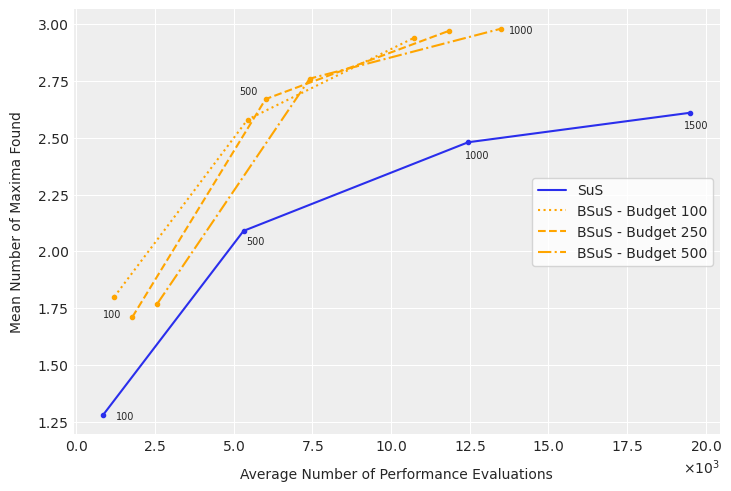

In [93]:
az.style.use('arviz-darkgrid')
markersize = 3
level_text_size = 7
legend_text_size = 10
sci_not_size = 10
axis_label_size = 10
tick_size = 10

[100,500,1000,1500,2000]

plotter = np.array(him_sus_dim_2_points)[:-1].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='SuS',
         markersize=markersize)

plt.text(plotter[0][0]+400,plotter[1][0]-0.02,'100',  fontsize=level_text_size)
plt.text(plotter[0][1]+100,plotter[1][1]-0.06,'500',  fontsize=level_text_size)
plt.text(plotter[0][2]-100,plotter[1][2]-0.07,'1000',  fontsize=level_text_size)
plt.text(plotter[0][3]-200,plotter[1][3]-0.07,'1500',  fontsize=level_text_size)


plotter = np.array(him_bss_dim_2_budg_100_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - Budget 100',
         color='orange',
         linestyle='dotted',
         markersize=markersize)

plt.text(plotter[0][0]-350,plotter[1][0]-0.09,'100',  fontsize=level_text_size)
plt.text(plotter[0][1]-250,plotter[1][1]+0.11,'500',  fontsize=level_text_size)
plt.text(plotter[0][2]+3000,plotter[1][2]+0.02,'1000',  fontsize=level_text_size)


plotter = np.array(him_bss_dim_2_budg_250_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - Budget 250',
         color='orange',
         linestyle='dashed',
         markersize=markersize)


plotter = np.array(him_bss_dim_2_budg_500_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - Budget 500',
         color='orange',
         linestyle='dashdot',
         markersize=markersize)

plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)},
           fontsize=legend_text_size,
           frameon=True,
           facecolor='white',
           loc='center right')


plt.xlabel('Average Number of Performance Evaluations', fontsize=axis_label_size, labelpad=10)
plt.ylabel('Mean Number of Maxima Found', fontsize=axis_label_size, labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

ax = plt.gca()
ax.xaxis.offsetText.set_fontsize(sci_not_size)

In [ ]:
mean Number of Maxima Found

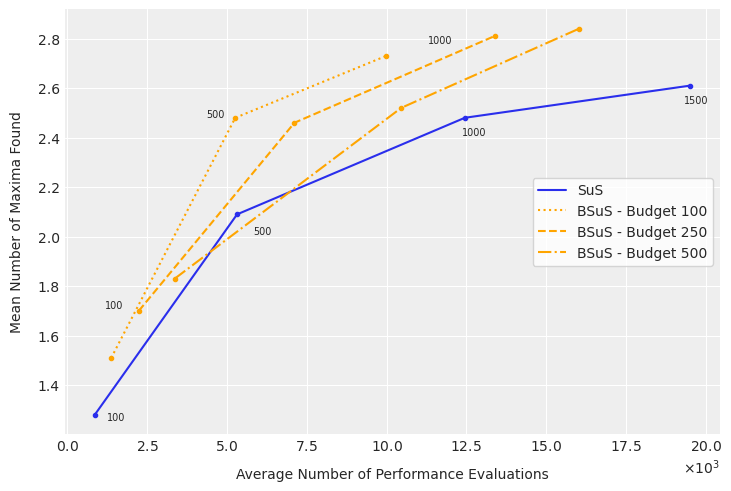

In [123]:
az.style.use('arviz-darkgrid')
markersize = 3
level_text_size = 7
legend_text_size = 10
sci_not_size = 10
axis_label_size = 10
tick_size = 10

plotter = np.array(him_sus_dim_2_points)[:-1].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='SuS',
         markersize=markersize)


plt.text(plotter[0][0]+400,plotter[1][0]-0.02,'100',  fontsize=level_text_size)
plt.text(plotter[0][1]+500,plotter[1][1]-0.08,'500',  fontsize=level_text_size)
plt.text(plotter[0][2]-100,plotter[1][2]-0.07,'1000',  fontsize=level_text_size)
plt.text(plotter[0][3]-200,plotter[1][3]-0.07,'1500',  fontsize=level_text_size)

plotter = np.array(him_bss_dim_50_budg_100_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - Budget 100',
         color='orange',
         linestyle='dotted',
         markersize=markersize)

plt.text(plotter[0][0]-200,plotter[1][0]+0.2,'100',  fontsize=level_text_size)
plt.text(plotter[0][1]-900,plotter[1][1],'500',  fontsize=level_text_size)
plt.text(plotter[0][2]+1300,plotter[1][2]+0.05,'1000',  fontsize=level_text_size)


plotter = np.array(him_bss_dim_50_budg_250_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - Budget 250',
         color='orange',
         linestyle='dashed',
         markersize=markersize)

plotter = np.array(him_bss_dim_50_budg_500_points)[:].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - Budget 500',
         color='orange',
         linestyle='dashdot',
         markersize=markersize)



plt.xlabel('Average Number of Performance Evaluations', fontsize=axis_label_size, labelpad=10)
plt.ylabel('Mean Number of Maxima Found', fontsize=axis_label_size, labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

ax = plt.gca()
ax.xaxis.offsetText.set_fontsize(sci_not_size)

plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)},
           fontsize=legend_text_size,
           frameon=True,
           facecolor='white',
           loc='center right')

In [125]:
with open("him_sus_dim_2.json", 'r') as file:
    loaded_results = json.load(file)
him_sus_dim_2 = pd.DataFrame(loaded_results)
him_sus_dim_2['design_sum']= him_sus_dim_2['design'].apply(sum)


with open("him_bss_dim_50_l1.json", 'r') as file:
    loaded_results = json.load(file)
him_bss_dim_50_l1 = pd.DataFrame(loaded_results)
him_bss_dim_50_l1['design_sum']= him_bss_dim_50_l1['design'].apply(sum)


with open("him_bss_dim_50_l2.json", 'r') as file:
    loaded_results = json.load(file)
him_bss_dim_50_l2 = pd.DataFrame(loaded_results)
him_bss_dim_50_l2['design_sum']= him_bss_dim_50_l2['design'].apply(sum)

In [127]:
him_sus_dim_2_points = []
for size in [100,500,1000,1500,2000]:
    him_sus_dim_2_points.append(evals_sum(him_sus_dim_2[him_sus_dim_2['size']==size]))

him_bss_dim_50_l1_points = []
for c in [0.5,2,5,10]:
    him_bss_dim_50_l1_points.append(evals_sum(him_bss_dim_50_l1[him_bss_dim_50_l1['C'] == c]))

him_bss_dim_50_l2_points = []
for c in [0.5,2,5,10]:
    him_bss_dim_50_l2_points.append(evals_sum(him_bss_dim_50_l2[him_bss_dim_50_l2['C'] == c]))
    

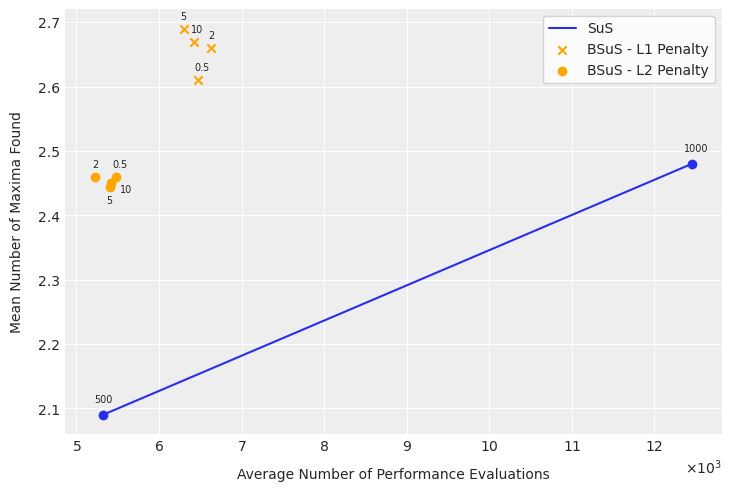

In [169]:
az.style.use('arviz-darkgrid')
level_text_size = 7
legend_text_size = 10
sci_not_size = 10
axis_label_size = 10
tick_size = 10


plotter = np.array(him_sus_dim_2_points)[1:-2].T
plt.plot(plotter[0],
         plotter[1],
         marker='o',
         label='SuS',
         )

plt.text(plotter[0][0]-100,plotter[1][0]+0.02,'500',  fontsize=level_text_size)
plt.text(plotter[0][1]-100,plotter[1][1]+0.02,'1000',  fontsize=level_text_size)

plotter = np.array(him_bss_dim_50_l1_points)[:].T
plt.scatter(plotter[0],
         plotter[1],
         label='BSuS - L1 Penalty',
         marker='x',
         color='orange',
         )


plt.text(plotter[0][0]-40,plotter[1][0]+0.015,'0.5',  fontsize=level_text_size)
plt.text(plotter[0][1]-30,plotter[1][1]+0.015,'2',  fontsize=level_text_size)
plt.text(plotter[0][2]-40,plotter[1][2]+0.015,'5',  fontsize=level_text_size)
plt.text(plotter[0][3]-40,plotter[1][3]+0.015,'10',  fontsize=level_text_size)

plotter = np.array(him_bss_dim_50_l2_points)[:].T
plt.scatter(plotter[0],
         plotter[1],
         marker='o',
         label='BSuS - L2 Penalty',
         color='orange',
         )


plt.text(plotter[0][0]-40,plotter[1][0]+0.015,'0.5',  fontsize=level_text_size)
plt.text(plotter[0][1]-30,plotter[1][1]+0.015,'2',  fontsize=level_text_size)
plt.text(plotter[0][2]-40,plotter[1][2]-0.025,'5',  fontsize=level_text_size)
plt.text(plotter[0][3]+110,plotter[1][3]-0.015,'10',  fontsize=level_text_size)

plt.xlabel('Average Number of Performance Evaluations', fontsize=axis_label_size, labelpad=10)
plt.ylabel('Mean Number of Maxima Found', fontsize=axis_label_size, labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3), useMathText=True)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)

ax = plt.gca()
ax.xaxis.offsetText.set_fontsize(sci_not_size)

plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)},
           fontsize=legend_text_size,
           frameon=True,
           facecolor='white',
           loc='upper right')

## example visualisation

In [112]:
bss = ConvexGraphBranching(performance_function=himmel,
                           dimension=2,
                           level_size=500,
                           threshold=np.inf,
                           level_probability=0.1,
                           seed=1,
                           params=None,
                           convex_budget=50,
                           verbose=False)

bss.run()

C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [109]:
partition_info = bss.partitioner.get_partition_information_for_level(bss.find('2'))
classifier = partition_info.classifier
performance_function = himmel

x_range = (-5,5)
y_range = (-5,5)
step =  0.01
function = classifier
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()

contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


break_1 = 1150
end_1 = -14


partition_x_1 = contour_points[0][:break_1].T[0]
partition_y_1 = contour_points[0][:break_1].T[1]
partition_z_1 = np.array([performance_function(pt) for pt in contour_points[0][:break_1]])

partition_x_1_5 = contour_points[0][break_1:end_1].T[0]
partition_y_1_5 = contour_points[0][break_1:end_1].T[1]
partition_z_1_5 = np.array([performance_function(pt) for pt in contour_points[0][break_1:end_1]])

partition_x_2 = contour_points[4].T[0]
partition_y_2 = contour_points[4].T[1]
partition_z_2 = np.array([performance_function(pt) for pt in contour_points[4]])


partition_info = bss.partitioner.get_partition_information_for_level(bss.find('6'))
classifier = partition_info.classifier
performance_function = himmel

x_range = (0,5)
y_range = (-5,5)
step =  0.01
function = classifier
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()

contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


break_1 = 230
end_1 = 20


partition_x_3 = contour_points[0][end_1:break_1].T[0]
partition_y_3 = contour_points[0][end_1:break_1].T[1]
partition_z_3 = np.array([performance_function(pt) for pt in contour_points[0][end_1:break_1]])

partition_x_3_5 = contour_points[0][break_1:].T[0]
partition_y_3_5 = contour_points[0][break_1:].T[1]
partition_z_3_5 = np.array([performance_function(pt) for pt in contour_points[0][break_1:]])

C:\Users\hkinn\AppData\Local\Temp\ipykernel_1148\1829415791.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


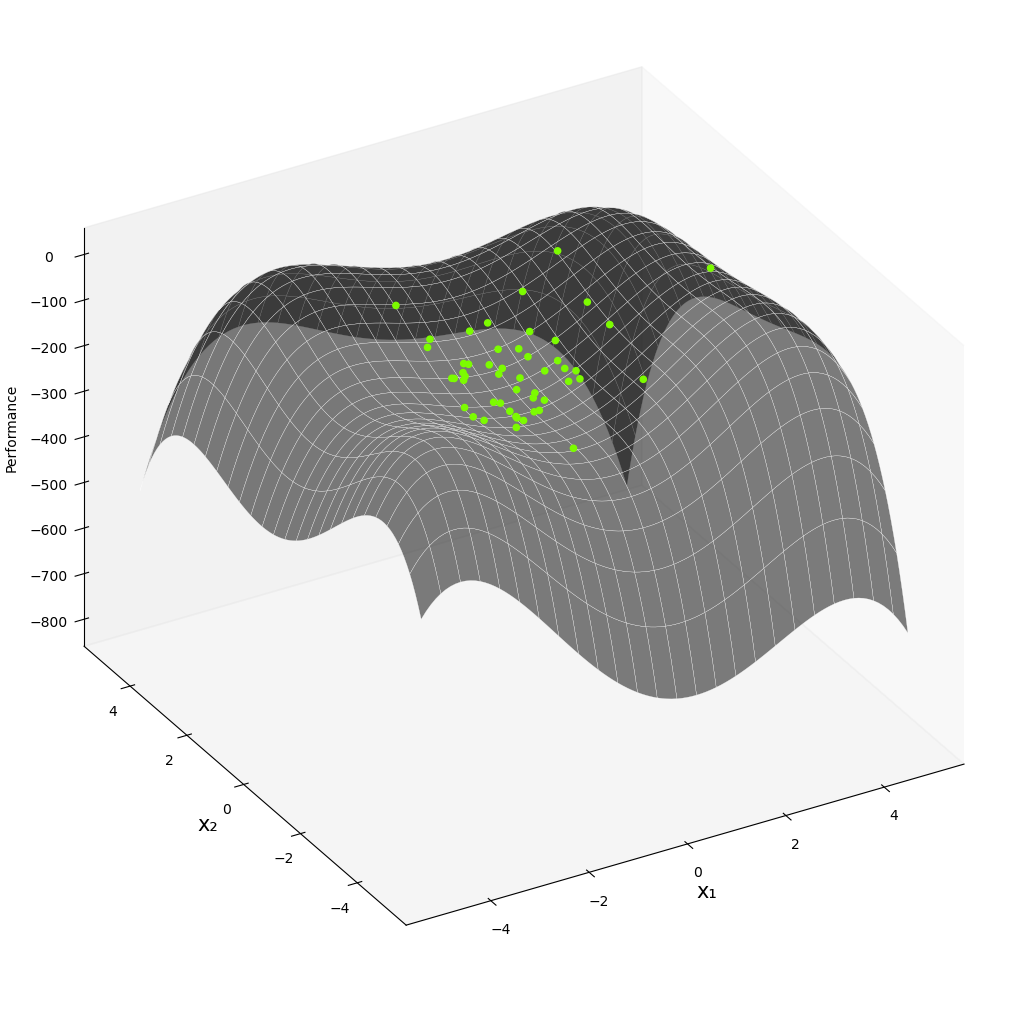

In [115]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = himmel
az.style.use('default')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)



cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Performance',fontsize=10,rotation=90, labelpad =10)
ax.grid(False)


ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')



re_level = bss.all_levels[0].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')

plt.show()

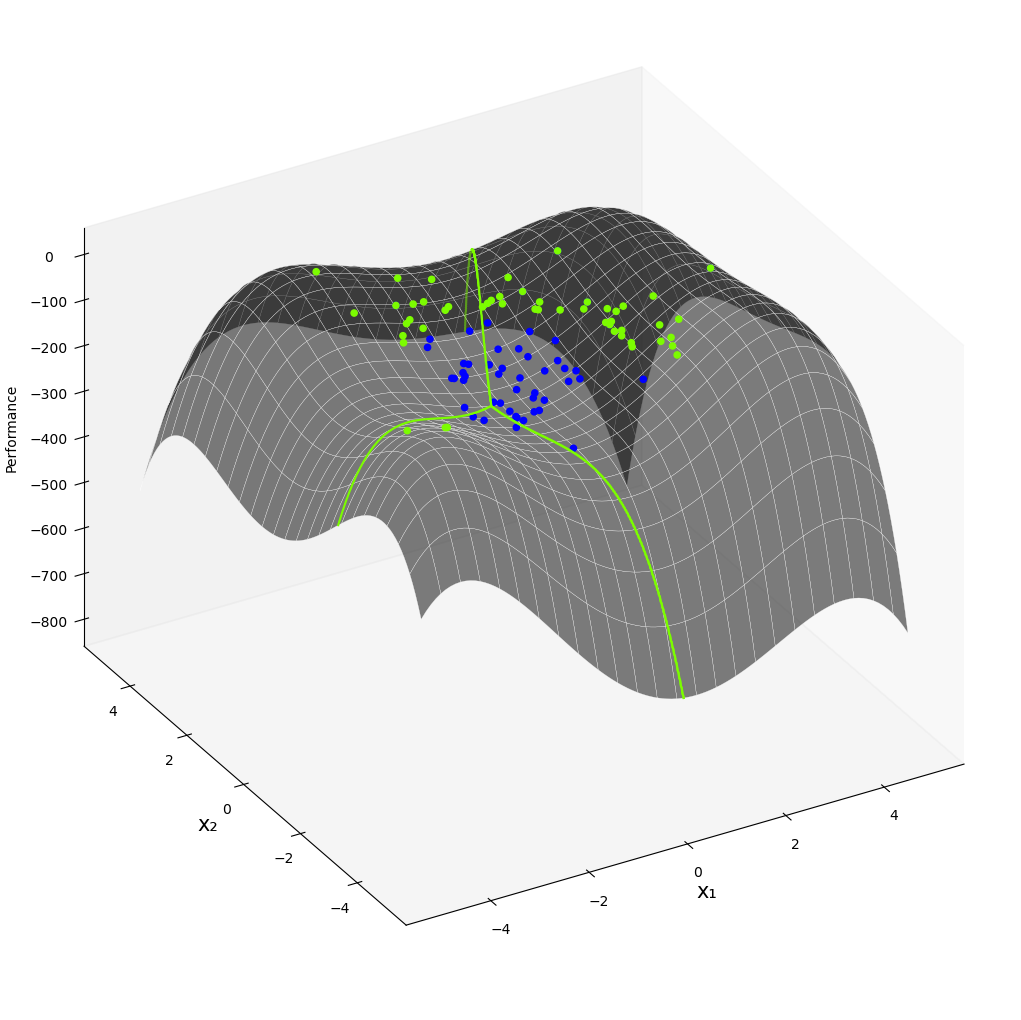

In [117]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = himmel
az.style.use('default')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)



cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Performance',fontsize=10,rotation=90, labelpad =10)
ax.grid(False)


ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')


for level in bss.all_levels[:1]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')


re_level = bss.all_levels[1].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')


ax.plot3D(partition_x_1,
          partition_y_1,
          partition_z_1,
          alpha=1,
          color='lawngreen')

ax.plot3D(partition_x_1_5,
          partition_y_1_5,
          partition_z_1_5,
          alpha=0.5,
          color='lawngreen')


ax.plot3D(partition_x_2,
          partition_y_2,
          partition_z_2,
          alpha=1,
          color='lawngreen')

plt.show()

In [120]:
len(bss.all_levels)

20

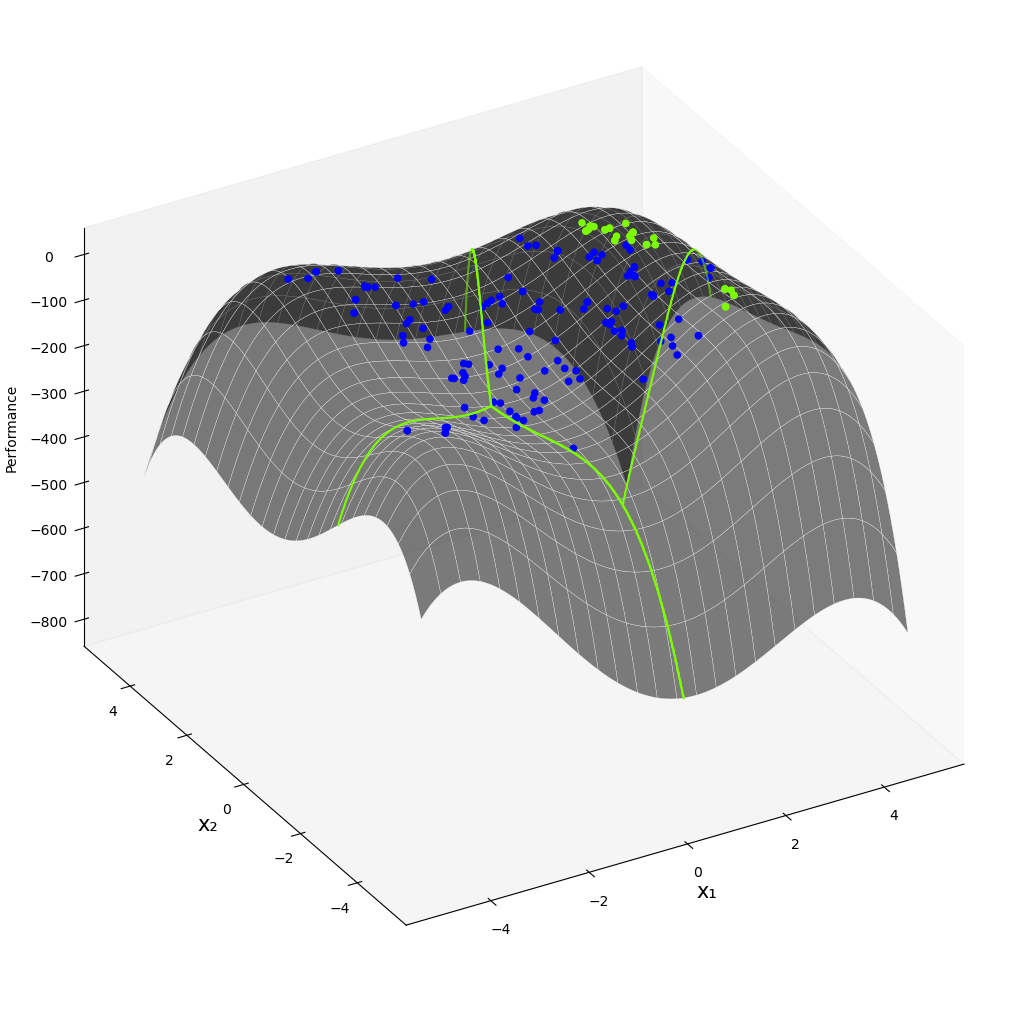

In [118]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = himmel
az.style.use('default')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)



cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Performance',fontsize=10,rotation=90, labelpad =10)
ax.grid(False)


ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')


for level in bss.all_levels[:5]:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')


re_level = bss.all_levels[5].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='lawngreen')


ax.plot3D(partition_x_1,
          partition_y_1,
          partition_z_1,
          alpha=1,
          color='lawngreen')

ax.plot3D(partition_x_1_5,
          partition_y_1_5,
          partition_z_1_5,
          alpha=0.5,
          color='lawngreen')


ax.plot3D(partition_x_2,
          partition_y_2,
          partition_z_2,
          alpha=1,
          color='lawngreen')

ax.plot3D(partition_x_3,
          partition_y_3,
          partition_z_3,
          alpha=0.5,
          color='lawngreen')

ax.plot3D(partition_x_3_5,
          partition_y_3_5,
          partition_z_3_5,
          alpha=1,
          color='lawngreen')

plt.show()

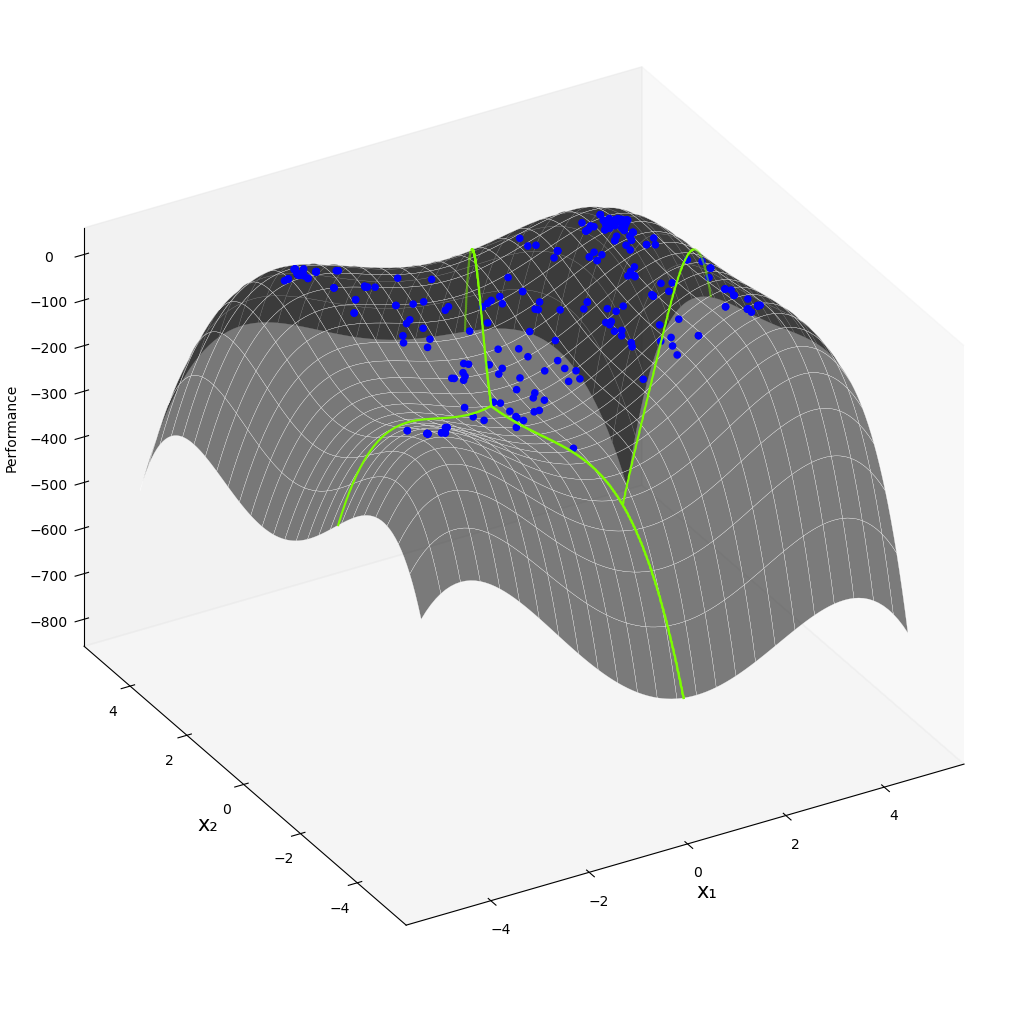

In [121]:
stride = 4
lw = 0.2
alpha = 0.5
alias = True
performance_function = himmel
az.style.use('default')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)


fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d',computed_zorder=False)



cmap = mcol.ListedColormap(['black', 'red'])
boundaries = [-1000,0,1000]
norma = mcol.BoundaryNorm(boundaries, 2)


ax.plot_surface(xx, yy, zz, rstride=stride, cstride=stride,
                antialiased=alias,cmap=cmap,norm=norma,alpha=alpha, edgecolors='white', lw=lw)


ax.view_init(30,-120)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('Performance',fontsize=10,rotation=90, labelpad =10)
ax.grid(False)


ax.zaxis.set_tick_params(pad=7)
ax.set_proj_type('ortho')


for level in bss.all_levels:
    re_level = level.sample_list[0::10]
    array_level = [samp.array for samp in re_level]
    samp_x = np.array(array_level).T[0]
    samp_y = np.array(array_level).T[1]
    samp_z = np.array([samp.performance for samp in re_level])
    ax.scatter(samp_x,samp_y,samp_z,alpha=1 ,color='blue')





ax.plot3D(partition_x_1,
          partition_y_1,
          partition_z_1,
          alpha=1,
          color='lawngreen')

ax.plot3D(partition_x_1_5,
          partition_y_1_5,
          partition_z_1_5,
          alpha=0.5,
          color='lawngreen')


ax.plot3D(partition_x_2,
          partition_y_2,
          partition_z_2,
          alpha=1,
          color='lawngreen')

ax.plot3D(partition_x_3,
          partition_y_3,
          partition_z_3,
          alpha=0.5,
          color='lawngreen')

ax.plot3D(partition_x_3_5,
          partition_y_3_5,
          partition_z_3_5,
          alpha=1,
          color='lawngreen')

plt.show()